In [1]:
from sympy import *
import sympy
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

## 设定展示格式

In [2]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [19]:
expr = x + 2 * y
x * expr

## 展开式expand

In [21]:
expanded_expr = expand(x * expr)
expanded_expr

In [50]:
expand((x + 1)*(x - 2) - (x - 1)*x)

## 因式分解factor

In [23]:
factor(expanded_expr)

In [52]:
factor(x**3 - x**2 + x - 1)

In [54]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [56]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

## collect

In [58]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [61]:
collect(expr, x)

In [64]:
collect(expr, x).coeff(x, 2)    #选取系数

## 化简为分数形式cancel

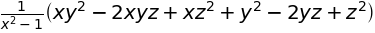

In [68]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

In [70]:
%time
cancel(expr)

Wall time: 0 ns


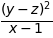

In [71]:
factor(expr)

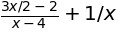

In [4]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

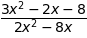

In [5]:
cancel(expr)

## apart分解为最简分式和

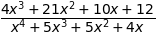

In [7]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

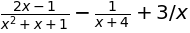

In [8]:
apart(expr)

## 求导

In [7]:
diff(sin(x) * exp(x), x)

## 求极限

In [7]:
limit((x * cot(3 * x)), x, 0)

In [8]:
limit((x ** 3 + x ** 2 + 1) / (2 ** x + x ** 3) * (sin(x) + cos(x)), x, oo)

In [6]:
limit((x ** 2 * sin(1 / x) + sin(x)) / x, x, 0)

## 三角函数展开expand_trig与替换subs(x, arg)

In [9]:
expr = sin(2 * x) + cos(2 * x)
expand_trig(expr)

In [10]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

## 求级数

级数1：$\frac{3}{2^{n}} - \frac{4}{3^{n}}$
级数2：$\frac{1}{n^{2}} - \frac{1}{n}$
级数3：$\frac{n-100}{n}$

In [17]:
i, n = symbols('i n', integer = True)
expr1 = 3 / (2 ** n) - 4 / (3 ** n)
expr2 = 1 / (n ** 2) - 1 / n
expr3 = (n - 100) / n

In [13]:
print(Sum(expr1, (n, 1, oo)).is_convergent(),Sum(expr2, (n, 1, oo)).is_convergent(),
Sum(expr3, (n, 1, oo)).is_convergent())

True False False


In [14]:
Product(n/(n + 1), (n, 1, oo)).is_convergent()  #判定连乘收敛

In [20]:
Sum((-1)**n, (n, 1, oo)).is_absolutely_convergent()    #判定绝对收敛

In [22]:
Sum((-1)**n/n**2, (n, 1, oo)).is_absolutely_convergent()

$\sum_{n=1}^∞\frac{1}{n(n+1)(n+2)}$

In [6]:
expr = 1 / (n * (n + 1) * (n + 2))
Sum(expr,(n, 1, oo)).doit()

$\sum_{n=1}^∞\frac{1}{1(3n-2)(3n+1)}$

In [11]:
expr = 1 / ((3 * n - 2) * (3 * n + 1))
Sum(expr,(n, 1, oo)).doit().evalf()

$\sum_{n=1}^∞\frac{n}{(n+1)!}$

In [12]:
expr = n / factorial(n + 1)    #阶乘
Sum(expr, (n, 1, oo)).doit()

$\sum_{n=1}^∞\prod_{i=1}^{n+1}\frac{2}{2^{i}+1}$

In [23]:
expr = 2 / (2 ** i + 1)
prod = Product(expr, (i, 1, n + 1))
sums = Sum(prod, (n, 1, oo))
sums.evalf()

## 使用list进行多变量替换

In [16]:
expr = x ** 3 + 4 * x * y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

## subs变量互换

In [17]:
expr = x ** 4 - 4 * x ** 3 + 4 * x ** 2 - 2 * x + 3
replacements = [(x ** i, y ** i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

## 展示等式

In [6]:
Eq(x + 1, 4)

## 使用evalf()进行数值输出

In [20]:
expr = sqrt(8)
expr

In [22]:
expr.evalf()

In [24]:
pi.evalf(10)    #输出π小数点后10位

In [25]:
expr = cos(2 * x)
expr.evalf(subs = {x : 2.4})

In [32]:
one = cos(1) ** 2 + sin(1) ** 2
(one - 1).evalf()

In [33]:
(one - 1).evalf(chop=True)

## 衡量两个表达式是否结构相同

In [35]:
(x + 1) ** 2 == x ** 2 + 2 * x +1

False

## 使用simplify化简

In [43]:
a = (x + 1) ** 2
b = x ** 2 + 2 * x + 1
print(simplify(a - b))
c = x ** 2 - 2 * x + 1
simplify(a - c)

0


In [45]:
simplify(gamma(x)/gamma(x - 2))

In [9]:
factor(simplify(x**2 + 2*x + 1))

In [10]:
expr = sin(x) ** 4 - 2 * cos(x) ** 2 * sin(x) ** 2 + cos(x) ** 4
expr

In [11]:
trigsimp(expr)

## 用sympify将string转化为表达式

In [18]:
expr = sympify("x ** 2 + 3 * x - 1 / 2")
expr

## 判断表达式是否相等

In [40]:
a = cos(x) ** 2 - sin(x) ** 2
b = cos(2 * x)
a.equals(b)

True

## 格式化输出(分式)

In [43]:
Integer(1) / Integer(3)

In [45]:
Rational(1, 2)

In [47]:
x + 1 / 2

In [49]:
x + Rational(1, 2)

## lambdify

In [36]:
a = np.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [41]:
f = lambdify(x, expr, "math")
f(0.1)

In [72]:
def mysin(x):
     """
     My sine. Note that this is only accurate for small x.
     """
     return x
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

In [75]:
expand_log(log(x*y))

In [24]:
expand_log(log(x/y))